In [ ]:
# Import Dataset
import pandas as pd
df = pd.read_csv("/car.csv")
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Find Missing Values
df.shape
df.info()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   doors       1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boot    1728 non-null   object
 6   safety      1728 non-null   object
 7   class       1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1723,False,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,Unnamed: 0
count,1728.000000
mean,863.500000
std,498.974949
min,0.000000
25%,431.750000
50%,863.500000
75%,1295.250000
max,1727.000000


In [ ]:
# Create a copy to encode
df_encoded = df.copy()

# Initialize label encoders and apply to each column
label_encoders = {}
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Preview the encoded data
print(df_encoded.head())

   Unnamed: 0  buying  maint  doors  persons  lug_boot  safety  class
0           0       3      3      0        0         2       1      2
1           1       3      3      0        0         2       2      2
2           2       3      3      0        0         2       0      2
3           3       3      3      0        0         1       1      2
4           4       3      3      0        0         1       2      2


<ipython-input-29-e59706c8c9d7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, order=df['class'].value_counts().index,palette='dark')


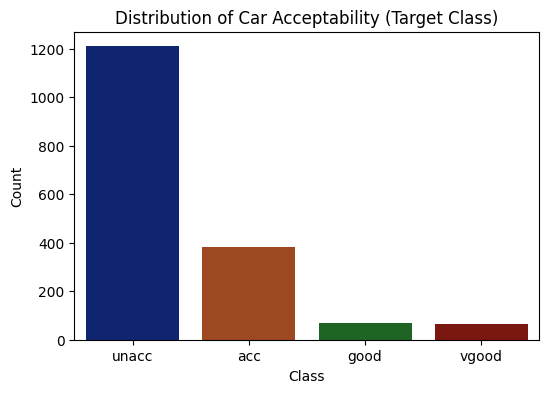

In [ ]:
#Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

# Use df instead of df_cleaned
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, order=df['class'].value_counts().index,palette='dark')
plt.title('Distribution of Car Acceptability (Target Class)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



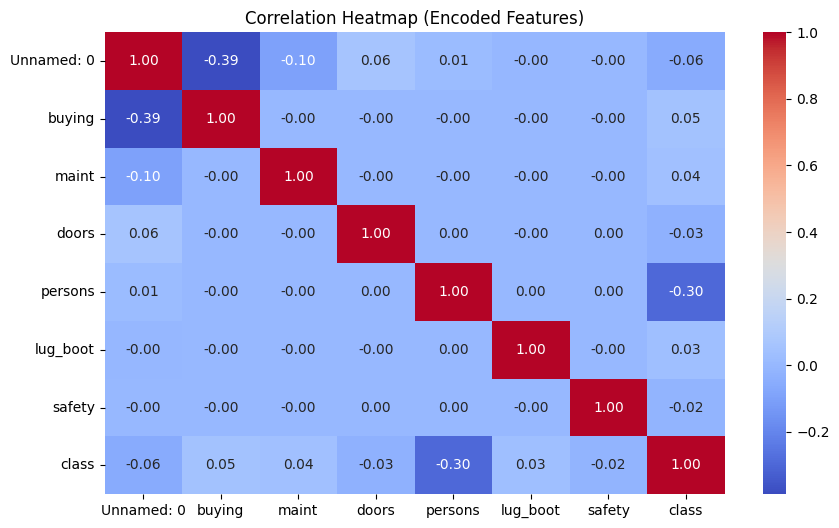

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9653179190751445

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        83
           1       0.67      0.91      0.77        11
           2       0.98      1.00      0.99       235
           3       0.94      0.88      0.91        17

    accuracy                           0.97       346
   macro avg       0.89      0.92      0.90       346
weighted avg       0.97      0.97      0.97       346


Confusion Matrix:
 [[ 75   4   4   0]
 [  0  10   0   1]
 [  1   0 234   0]
 [  1   1   0  15]]


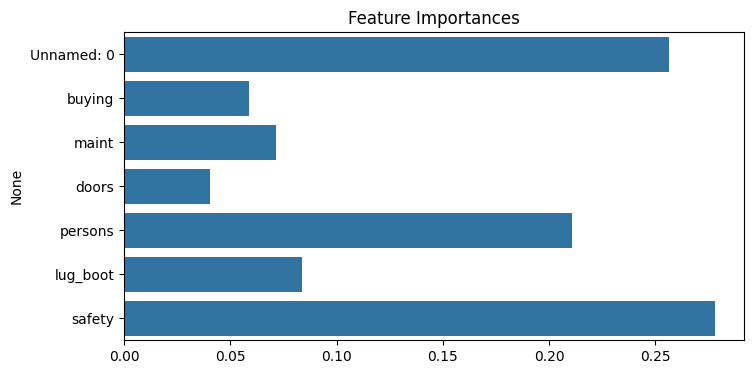

In [ ]:
# Feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.show()
